In [246]:
#Import Necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [247]:
#Read Data
data = pd.read_csv('ex1data2.txt', header=None)
data.columns = ['HouseSize', 'NumOfBedrooms','Price']

In [248]:
#Data Summary
data.head()

,HouseSize,NumOfBedrooms,Price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [249]:
data.NumOfBedrooms.value_counts()

3    25
4    14
2     6
5     1
1     1
Name: NumOfBedrooms, dtype: int64

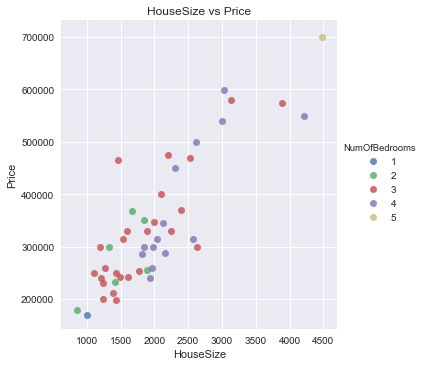

In [250]:
#plotting House Size vs Price
sns.lmplot(x='HouseSize', y='Price', hue='NumOfBedrooms',data=data, fit_reg=False)
plt.xlabel('HouseSize')
plt.ylabel('Price')
plt.title('HouseSize vs Price')

In [251]:
#Create X matrix
X = np.array([data.HouseSize,data.NumOfBedrooms]).T
#Create Y Matrix
y=np.array(data.Price)

y = y.reshape(-1,1)

In [252]:
X.shape

(47, 2)

In [264]:
#Normalize Feaure
def featureNormalize(X):
    mean = np.mean(X,axis=0)
    #Python by default takes ddof = 0 for std. Octave std function takes ddof = 1.
    #We need to write ddof =1 to have the same result.
    sigma = np.std(X,axis=0, ddof=1)
    X_norm = (X - mean) / sigma
    return X_norm

In [265]:
#Add x0 column
def addColumn(X):
    values = np.full(X.shape[0],1).reshape(-1,1)
    X_norm = np.concatenate([values, X],axis=1)
    return X_norm

In [266]:
#Initialize theta Matrix as 0 Matrix
theta = np.zeros((3,1))

In [267]:
#Check theta Matrix shape
theta

array([[ 0.],
       [ 0.],
       [ 0.]])

In [268]:
# h = theta0 * x0 + theta1 * x1 + theta2 * x2
# x1 and x2 are the Features Matrix second column and x0 is the Feature Matrix first column
# x0 is always 1 for calculation
# J = (sum((h-y)^2)) * 1/2m, m = Observation Number = Feature Number
# J = Cost Function
def costfunction(X, theta, y):
    m = X[:,1].size
    h = np.dot(X,theta)
    J = np.sum(np.square(h-y))/(2*m)
    return J

In [269]:
#Grading Decent
def gradingDecent (X, theta, y, alpha, iteration):
    m = X[:,1].size
    J_change = []
    for i in range(iteration):
        h = np.dot(X,theta) - y
        theta = theta - ((alpha/m)*(np.dot(X.T,h)))
        J_change.append(costfunction(X, theta, y))
    return theta,J_change

In [270]:
#Main function for Linear Regression
def linearRegression(X, theta, y, alpha, iteration):
    X_norm = featureNormalize(X)
    X_norm = addColumn(X_norm)
    theta,J_vals = gradingDecent(X_norm, theta, y, alpha, iteration)
    return theta,J_vals

In [271]:
#Run linear regression with alpha = 0.01 and iteration = 50 parameters 
alpha = 0.1
iteration = 50
theta,J_vals = linearRegression(X, theta, y, alpha, iteration)

In [272]:
#Check theta value
theta

array([[  3.38658249e+05],
       [  1.04127516e+05],
       [ -1.72205334e+02]])

This is the same value of the Octave code

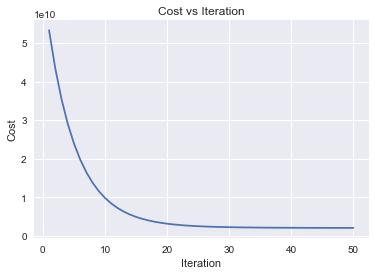

In [273]:
#Plot the Cost function vs Iteration Graph
iteration_number = range(1,iteration+1)
plt.plot(iteration_number,J_vals)
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.title('Cost vs Iteration')
plt.show()

Theta goes down and stay same after nearly 15 iteration.

In [274]:
#Find price for 1650 sq.feet and 3 bedrooms house
price = np.dot([1, (1650-np.mean(X,axis=0)[0])/np.std(X,axis=0, ddof=1)[0], (3-np.mean(X,axis=0)[1])/np.std(X,axis=0, ddof=1)[1]] , theta)

In [275]:
#Check the price
price

array([ 292748.08523215])

In [276]:
#Do the same analysis with normal equation
def normalEquation(X,y):
    from numpy.linalg import inv
    X_norm = addColumn(X)
    print(X_norm.shape)
    theta = np.zeros((3,1))
    theta = np.dot(np.dot(inv(np.dot(np.transpose(X_norm),X_norm)),np.transpose(X_norm)),y)
    return theta

In [277]:
#Check the theta
theta = normalEquation(X,y)
theta

(47, 3)


array([[ 89597.9095428 ],
       [   139.21067402],
       [ -8738.01911233]])

In [278]:
#Find price for 1650 sq.feet and 3 bedrooms house
price = np.dot([1, (1650-np.mean(X,axis=0)[0])/np.std(X,axis=0, ddof=1)[0], (3-np.mean(X,axis=0)[1])/np.std(X,axis=0, ddof=1)[1]] , theta)

In [279]:
#Check the price
price

array([ 91490.95766355])

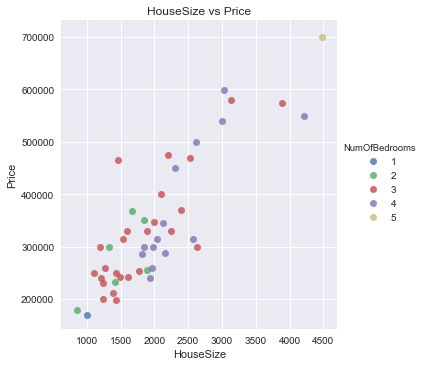

In [292]:
#Regression with using Python Sklearn Libraries

from sklearn import linear_model

# Create linear regression object
regr = linear_model.LinearRegression()

X_lib = data[['HouseSize','NumOfBedrooms']] 
Y_lib = data['Price']

#Split data into test and train
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_lib, Y_lib, test_size=0.2, random_state=42)

# Train the model using the training sets
regr.fit(X_train, y_train)

# Make predictions using the testing set
pred = regr.predict(X_test)

# Plot outputs
sns.lmplot(x='HouseSize', y='Price', hue='NumOfBedrooms',data=data, fit_reg=False)
plt.xlabel('HouseSize')
plt.ylabel('Price')
plt.title('HouseSize vs Price')
plt.show()

In [294]:
from sklearn.metrics import mean_squared_error, r2_score

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test, pred))


Variance score: 0.51


In [296]:
#Prediction for 1650 sqr.feet and 3 bedrooms house
print('For 1650 sqr.feet and 3 bedrooms house, Price prediction = ',regr.predict([1650,3]))

For 1650 sqr.feet and 3 bedrooms house, Price prediction =  [ 280536.50711115]


C:\Users\volkan.sahin\Downloads\Python\WinPython-64bit-3.5.3.1Qt5\python-3.5.3.amd64\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


Price is close to the value that we have calculated before.